In [1]:
import pandas as pd
import numpy as np
from ExperimentSetting import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df=pd.read_csv('results_10_6_18.csv')
df=pd.read_csv('experement_6_6_18.csv')

In [3]:
groups=['df_name','number_of_estimators','max_number_of_branches']
df[[col for col in df.columns if 'accuracy' in col]+groups].groupby(groups).mean()

decision_tree_accuracy  \
df_name       number_of_estimators max_number_of_branches                           
breast cancer 3                    inf                                   0.953171   
              4                    inf                                   0.941951   
              5                    inf                                   0.940000   
iris          3                    inf                                   0.942222   
              4                    inf                                   0.933333   
              5                    inf                                   0.944444   
winery        3                    inf                                   0.911111   
              4                    inf                                   0.894444   
              5                    inf                                   0.888889   

                                                           ensemble_accuracy  \
df_name       number_of_estimators max_number_of_branches                      
breast cancer 3                    inf                              0.956585   
              4                    inf                              0.958049   
              5                    inf                              0.962439   
iris          3                    inf                              0.935556   
              4                    inf                              0.937778   
              5                    inf                              0.942222   
winery        3                    inf                              0.927778   
              4                    inf                              0.922222   
              5                    inf                              0.950000   

                                                           new_model_accuracy  
df_name       number_of_estimators max_number_of_branches                      
breast cancer 3                    inf                               0.954634  
              4                    inf                               0.958049  
              5                    inf                               0.955122  
iris          3                    inf                               0.935556  
              4                    inf                               0.937778  
              5                    inf                               0.944444  
winery        3                    inf                               0.927778  
              4                    inf                               0.922222  
              5                    inf                               0.920370

In [4]:
df[[col for col in df.columns if 'auc' in col]+groups].groupby(groups).mean()

decision_tree_auc  \
df_name       number_of_estimators max_number_of_branches                      
breast cancer 3                    inf                              0.970834   
              4                    inf                              0.952963   
              5                    inf                              0.967866   
iris          3                    inf                              0.959815   
              4                    inf                              0.960790   
              5                    inf                              0.965259   
winery        3                    inf                              0.940441   
              4                    inf                              0.921862   
              5                    inf                              0.930195   

                                                           ensemble_auc  \
df_name       number_of_estimators max_number_of_branches                 
breast cancer 3                    inf                         0.980452   
              4                    inf                         0.984951   
              5                    inf                         0.986896   
iris          3                    inf                         0.974938   
              4                    inf                         0.976864   
              5                    inf                         0.986272   
winery        3                    inf                         0.981233   
              4                    inf                         0.982716   
              5                    inf                         0.991075   

                                                           new_model_auc  
df_name       number_of_estimators max_number_of_branches                 
breast cancer 3                    inf                          0.983093  
              4                    inf                          0.982425  
              5                    inf                          0.988355  
iris          3                    inf                          0.969691  
              4                    inf                          0.980235  
              5                    inf                          0.977778  
winery        3                    inf                          0.979878  
              4                    inf                          0.978781  
              5                    inf                          0.980384

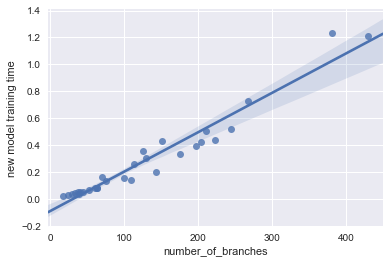

In [5]:
sns.regplot(x='number_of_branches',y='new model training time',data=df[df['df_name']=='iris'])

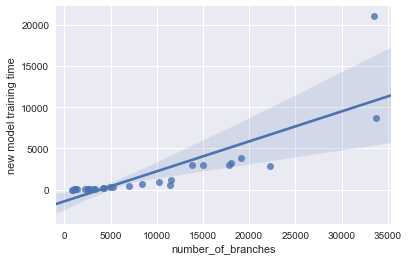

In [6]:
sns.regplot(x='number_of_branches',y='new model training time',data=df[df['df_name']=='breast cancer'])

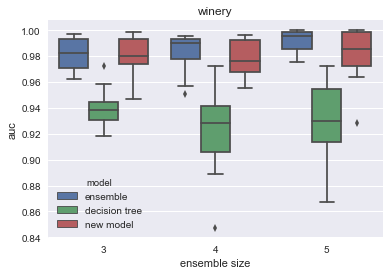

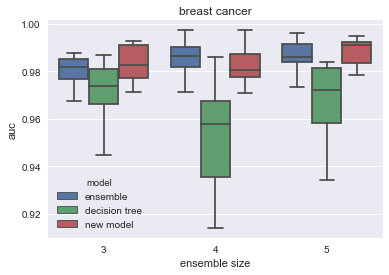

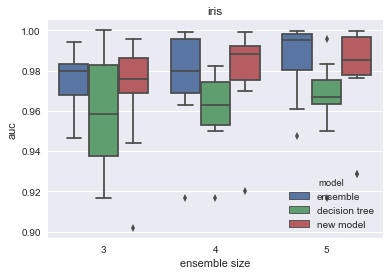

In [7]:
l=[]
for index,row in df.iterrows():
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'ensemble','auc':row['ensemble_auc']})
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'decision tree','auc':row['decision_tree_auc']})
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'new model','auc':row['new_model_auc']})
for df_name in ['winery','breast cancer','iris']:
    boxplot_data=pd.DataFrame(l)
    boxplot_data=boxplot_data[boxplot_data['df_name']==df_name]
    sns.boxplot(x='ensemble size',hue='model',y='auc',data=boxplot_data)
    plt.title(df_name)
    plt.show()
    plt.clf()

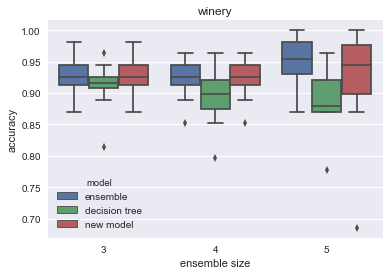

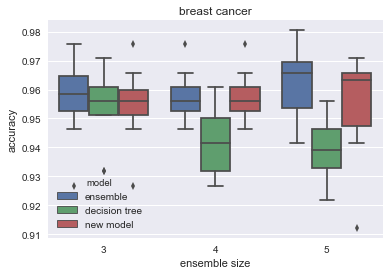

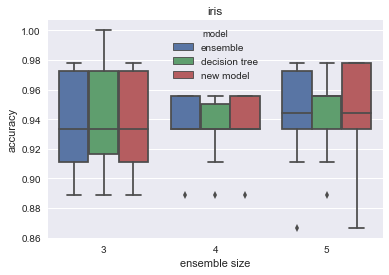

In [8]:
l=[]
for index,row in df.iterrows():
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'ensemble','accuracy':row['ensemble_accuracy']})
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'decision tree','accuracy':row['decision_tree_accuracy']})
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'new model','accuracy':row['new_model_accuracy']})
for df_name in ['winery','breast cancer','iris']:
    boxplot_data=pd.DataFrame(l)
    boxplot_data=boxplot_data[boxplot_data['df_name']==df_name]
    sns.boxplot(x='ensemble size',hue='model',y='accuracy',data=boxplot_data)
    plt.title(df_name)
    plt.show()
    plt.clf()

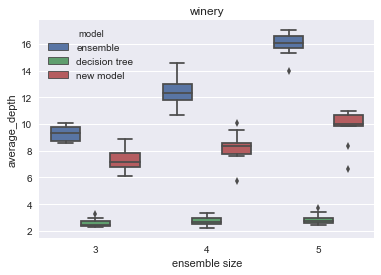

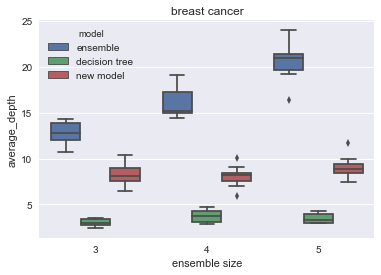

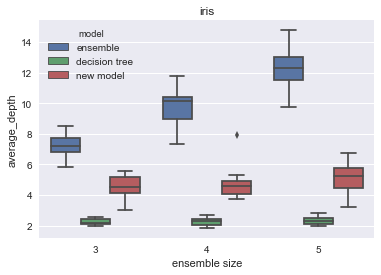

In [9]:
l=[]
for index,row in df.iterrows():
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'ensemble','average_depth':row['ensemble_average_depth']})
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'decision tree','average_depth':row['decision_tree_average_depth']})
    l.append({'df_name':row['df_name'],'ensemble size':row['number_of_estimators'],'model':'new model','average_depth':row['new_model_average_depth']})
for df_name in ['winery','breast cancer','iris']:
    boxplot_data=pd.DataFrame(l)
    boxplot_data=boxplot_data[boxplot_data['df_name']==df_name]
    sns.boxplot(x='ensemble size',hue='model',y='average_depth',data=boxplot_data)
    plt.title(df_name)
    plt.show()
    plt.clf()

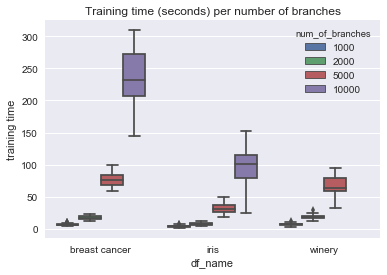

In [25]:
l=[]
for index,row in df[df['number_of_estimators']==100].iterrows():
    l.append({'df_name':row['df_name'],'num_of_branches':row['max_number_of_branches'],'model':'new model','training time':row['new model training time']})
boxplot_data = pd.DataFrame(l)
sns.boxplot(x='df_name',y='training time',hue='num_of_branches',data=boxplot_data)
plt.title('Training time (seconds) per number of branches')

In [ ]:
l=[]
for index,row in df[df['number_of_estimators']==100].iterrows():
    l.append({'df_name':row['df_name'],'num_of_branches':row['max_number_of_branches'],'model':'ensemble','average_depth':row['ensemble_average_depth']})
    l.append({'df_name':row['df_name'],'num_of_branches':row['max_number_of_branches'],'model':'decision tree','average_depth':row['decision_tree_average_depth']})
    l.append({'df_name':row['df_name'],'num_of_branches':row['max_number_of_branches'],'model':'new model','average_depth':row['new_model_average_depth']})
for df_name in ['winery','breast cancer','iris']:
    boxplot_data=pd.DataFrame(l)
    boxplot_data=boxplot_data[boxplot_data['df_name']==df_name]
    boxplot_data['average_depth']=[np.log(i) for i in boxplot_data['average_depth']]
    sns.boxplot(x='num_of_branches',hue='model',y='average_depth',data=boxplot_data)
    plt.title(df_name+' (log)')
    plt.show()
    plt.clf()

In [9]:
df[[col for col in df.columns if 'average_depth' in col]+groups].groupby(groups).mean()

decision_tree_average_depth  \
df_name       number_of_estimators max_number_of_branches                                
breast cancer 3                    1000                                       3.313496   
                                   2000                                       3.132520   
                                   5000                                       3.305691   
                                   10000                                      3.116423   
              5                    1000                                       3.203902   
                                   2000                                       3.240813   
                                   5000                                       3.137236   
                                   10000                                      3.179187   
              20                   1000                                       3.236911   
                                   2000                                       3.215935   
                                   5000                                       3.296423   
                                   10000                                      3.234472   
              50                   1000                                       3.263577   
                                   2000                                       3.127480   
                                   5000                                       3.272683   
                                   10000                                      3.273333   
              100                  1000                                       3.253496   
                                   2000                                       3.037236   
                                   5000                                       3.158699   
                                   10000                                      3.278049   
iris          3                    1000                                       2.280741   
                                   2000                                       2.289630   
                                   5000                                       2.314815   
                                   10000                                      2.317037   
              5                    1000                                       2.260741   
                                   2000                                       2.231111   
                                   5000                                       2.240741   
                                   10000                                      2.314815   
              20                   1000                                       2.329630   
                                   2000                                       2.277778   
                                   5000                                       2.302222   
                                   10000                                      2.277037   
              50                   1000                                       2.328148   
                                   2000                                       2.246667   
                                   5000                                       2.260000   
                                   10000                                      2.285185   
              100                  1000                                       2.302963   
                                   2000                                       2.234074   
                                   5000                                       2.269630   
                                   10000                                      2.217037   
winery        3                    1000                                       2.690123   
                                   2000                                       2.677778   
                                   5000                                       2.796296   
         